In [144]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import calendar
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


In [145]:
os.chdir("C:/Users/Vikash Singh/Desktop/r and python/bike_rent")

In [146]:
bike_rent=pd.read_csv("C:/Users/Vikash Singh/Desktop/r and python/bike_rent/day.csv")

In [147]:
bike_rent.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


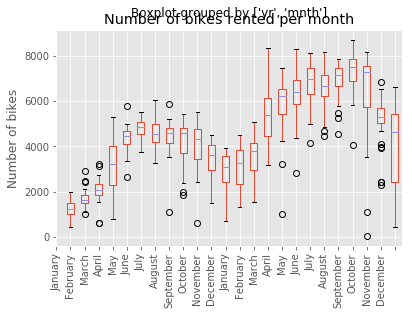

In [148]:
#count of bikes in the different months of the years

plt.style.use('ggplot')

bike_rent.boxplot(column='cnt', by=['yr','mnth'])

plt.title('Number of bikes rented per month')
plt.xlabel('')
plt.xticks((np.arange(0,len(bike_rent)/30,len(bike_rent)/731)), calendar.month_name[1:13]*2, rotation=90)
plt.ylabel('Number of bikes')

plt.show()

In [149]:
bike_rent=bike_rent.drop(columns=["dteday","instant"])

In [150]:
feature_cols = bike_rent.columns[:-3] 
target_col = bike_rent.columns[-1]
print(target_col)
print(feature_cols)

cnt
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')


In [151]:
bike_rent.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [152]:
x=bike_rent.iloc[:,0:11]
y=bike_rent['cnt']

In [153]:
x.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [154]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

### developing a decision tree regression model 

In [162]:
fit=DecisionTreeRegressor(max_depth=6,max_leaf_nodes=10,min_impurity_decrease=0.5,criterion='mse',min_samples_leaf=1,splitter='best').fit(x_train.iloc[:,0:11],y_train)

In [163]:
fit

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.5,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [164]:
prediction_dt=fit.predict(x_test.iloc[:,0:11])

In [165]:
prediction_dt

array([1729.39285714, 4429.01398601, 4429.01398601, 3326.075     ,
       6881.17266187, 6881.17266187, 5027.31914894, 6881.17266187,
       6881.17266187, 6881.17266187, 6881.17266187, 6881.17266187,
       5594.10344828, 5027.31914894, 1729.39285714, 1729.39285714,
       5027.31914894, 6881.17266187, 6881.17266187, 4429.01398601,
       5027.31914894, 4429.01398601, 3971.28      , 6881.17266187,
       1729.39285714, 2717.0625    , 6881.17266187, 3971.28      ,
       4429.01398601, 4429.01398601, 1729.39285714, 4429.01398601,
       6881.17266187, 4429.01398601, 1729.39285714, 3971.28      ,
       5027.31914894, 6881.17266187, 4429.01398601, 6881.17266187,
       4429.01398601, 2717.0625    , 4429.01398601, 3971.28      ,
       2717.0625    , 5027.31914894, 6881.17266187, 3971.28      ,
       1729.39285714, 4429.01398601, 4429.01398601, 5594.10344828,
       1729.39285714, 3971.28      , 4429.01398601, 5027.31914894,
       4429.01398601, 1729.39285714, 6881.17266187, 6881.17266

In [166]:
def mape(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

In [167]:
r2_score_dt=r2_score(y_test,prediction_dt)
print("Dicision tree results:\n")
print("R2_score: %f"%r2_score_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, prediction_dt))
print("Rmse: %f"%rmse_dt)
print("\nMAPE results:")
mape(y_test,prediction_dt)

Dicision tree results:

R2_score: 0.794462
Rmse: 858.613871

MAPE results:


24.17879818607351

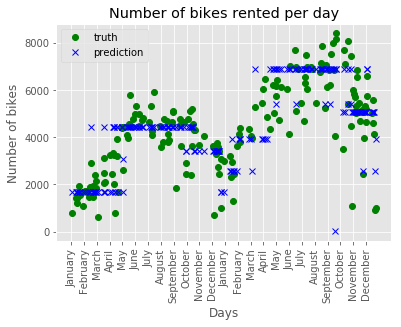

In [143]:
predict_dt = fit.predict(x_test)
predictions = pd.Series(predict_dt, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='truth')
plt.plot(predictions,'bx', label='prediction')

plt.title('Number of bikes rented per day')
plt.xlabel('Days')
plt.xticks((np.arange(0,len(bike_rent),len(bike_rent)/24)), calendar.month_name[1:13]*2, rotation=90)

plt.ylabel('Number of bikes')

plt.legend(loc='best')

plt.show()

### using stasmodel OLS

In [74]:
bike_rent=pd.read_csv("C:/Users/Vikash Singh/Desktop/r and python/bike_rent/day.csv")

In [75]:
bike_rent=bike_rent.drop(columns=["dteday","instant"])

In [76]:
x=bike_rent.iloc[:,0:11]
y=bike_rent['cnt']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [78]:
x_train.head()
y_train.head()

649    7570
591    6784
145    4677
471    6370
10     1263
Name: cnt, dtype: int64

In [79]:
lg_model=sm.OLS(y_train,x_train.iloc[:,0:11]).fit()

In [80]:
lg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1538.
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:30:57   Log-Likelihood:                -4486.3
No. Observations:                 548   AIC:                             8995.
Df Residuals:                     537   BIC:                             9042.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       489.2740     64.714      7.561      0.000     362.150     616.398
yr          2128.8976     74.447     28.596      0.000    1982.654    2275.141
mnth         -32.0373     20.543     -1.560      0.119     -72.392       8.317
holiday     -249.3870    230.712     -1.081      0.280    -702.596     203.822
weekday       65.4205     18.709      3.497      0.001      28.669     102.172
workingday   187.8862     82.976      2.264      0.024      24.889     350.883
weathersit  -583.7963     90.955     -6.418      0.000    -762.468    -405.124
temp       -5450.5913   2355.298     -2.314      0.021   -1.01e+04    -823.863
atemp       1.263e+04   2640.423      4.785      0.000    7447.797    1.78e+04
hum         -299.7762    315.070     -0.951      0.342    -918.697     319.144
windspeed   -901.0774    415.292     -2.170      0.030   -1716.874     -85.281
==============================================================================
Omnibus:                       92.718   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.948
Skew:                          -0.957   Prob(JB):                     5.10e-40
Kurtosis:                       5.064   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
prediction_lg=lg_model.predict(x_test.iloc[:,0:11])

In [82]:
r2_score_lg=r2_score(y_test,prediction_lg)
print("Statsmodel OLS :\n")
print("R2_score:%f"%r2_score_lg)
rmse_lg1 = np.sqrt(mean_squared_error(y_test, prediction_lg))
print("rmse:%f"%rmse_lg1)
print("\nMAPE error:")
mape(y_test,prediction_lg)

Statsmodel OLS :

R2_score:0.727670
rmse:989.283451

MAPE error:


137.65045656074582

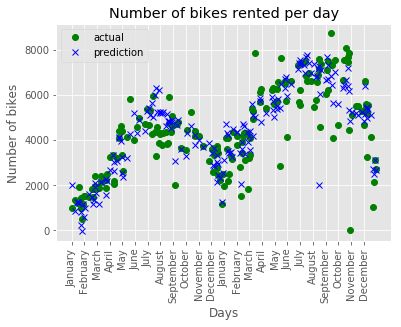

In [83]:
predict_lg = lg_model.predict(x_test)
predictions = pd.Series(predict_lg, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='actual')
plt.plot(predictions,'bx', label='prediction')

plt.title('Number of bikes rented per day')
plt.xlabel('Days')
plt.xticks((np.arange(0,len(bike_rent),len(bike_rent)/24)), calendar.month_name[1:13]*2, rotation=90)

plt.ylabel('Number of bikes')

plt.legend(loc='best')

plt.show()

### developing a scikit linear regression model

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
bike_rent=pd.read_csv("C:/Users/Vikash Singh/Desktop/r and python/bike_rent/day.csv")

In [87]:
bike_rent=bike_rent.drop(columns=["dteday","instant"])

In [88]:
x=bike_rent.iloc[:,0:11]
y=bike_rent['cnt']

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [90]:
x_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
360,1,0,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450
402,1,1,2,0,2,1,1,0.354167,0.361104,0.496250,0.147379
150,2,0,5,0,2,1,1,0.775000,0.725383,0.636667,0.111329
26,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837
80,2,0,3,0,2,1,1,0.441667,0.440642,0.624583,0.225750


In [91]:
y_train.head()

360    1162
402    4375
150    3982
26      431
80     2703
Name: cnt, dtype: int64

In [92]:
lg = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)

In [93]:
lg.fit(x_train.iloc[:,0:11],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [94]:
lg_predict=lg.predict(x_test.iloc[:,0:11])

In [95]:
mape(y_test,lg_predict)

125.03926305770298

In [96]:
r2_score_lg=r2_score(y_test,lg_predict)
print("R2_score:%f"%r2_score_lg)
rmse_lg = np.sqrt(mean_squared_error(y_test, lg_predict))
print("RMSE: %f"%rmse_lg)
print("\nMAPE Results")
mape(y_test,lg_predict)

R2_score:0.817429
RMSE: 840.551999

MAPE Results


125.03926305770298

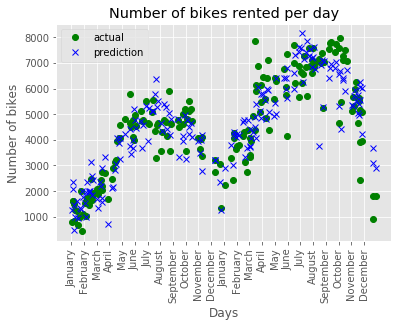

In [58]:
predict_lg2 = lg.predict(x_test)
predictions = pd.Series(predict_lg2, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='actual')
plt.plot(predictions,'bx', label='prediction')

plt.title('Number of bikes rented per day')
plt.xlabel('Days')
plt.xticks((np.arange(0,len(bike_rent),len(bike_rent)/24)), calendar.month_name[1:13]*2, rotation=90)

plt.ylabel('Number of bikes')

plt.legend(loc='best')

plt.show()

### developing a support vector regression model

In [109]:
bike_rent=pd.read_csv("C:/Users/Vikash Singh/Desktop/r and python/bike_rent/day.csv")

In [110]:
bike_rent=bike_rent.drop(columns=["dteday","instant"])

In [111]:
x=bike_rent.iloc[:,0:11]
y=bike_rent['cnt']

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [113]:
svr = SVR()
svr.fit(x_train, y_train)

C:\Users\Vikash Singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
svr_p = svr.predict(x_test)

score_svr = r2_score(y_test, svr_p)
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_p))

print("R^2_Score SVR: %f" % score_svr)
print("RMSE SVR: %f" % rmse_svr)
print("\n MAPE Results")
MAPE(y_test,svr_p)

R^2_Score SVR: 0.019368
RMSE SVR: 1932.803583

 MAPE Results


58.14973360385791

In [115]:
# Tuning Support Vector Regression with GridSearch

tuned_parameters = [{'C': [1000, 3000, 10000], 
                     'kernel': ['linear', 'rbf']}
                   ]

#svr_tuned = GridSearchCV(SVR (C=1), param_grid = tuned_parameters, scoring = 'mean_squared_error') #default 3-fold cross-validation, score method of the estimator
svr_tuned_GS = GridSearchCV(SVR (C=1), param_grid = tuned_parameters, scoring = 'r2', n_jobs=-1) #default 3-fold cross-validation, score method of the estimator

svr_tuned_GS.fit(x_train, y_train)

print (svr_tuned_GS)
print ('\n' "Best parameter from grid search: " + str(svr_tuned_GS.best_params_) +'\n')

C:\Users\Vikash Singh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1000, 3000, 10000],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

Best parameter from grid search: {'C': 10000, 'kernel': 'rbf'}



C:\Users\Vikash Singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [118]:
# Validation of Support Vector Regression after tunning 

svr_tuned_pred_GS = svr_tuned_GS.predict(x_test)

score_svr_tuned_GS = r2_score(y_test, svr_tuned_pred_GS)
rmse_svr_tuned_GS = np.sqrt(mean_squared_error(y_test, svr_tuned_pred_GS))

print("Support Vector Regression Results\n")

print("Score SVR: %f" % score_svr)
print("Score SVR tuned GS: %f" % score_svr_tuned_GS)

print("\nRMSE SVR: %f" % rmse_svr)
print("RMSE SVR tuned GS: %f" % rmse_svr_tuned_GS)
print("\nMAPE results:")
MAPE(y_test,svr_tuned_pred_GS)

Support Vector Regression Results

Score SVR: 0.019368
Score SVR tuned GS: 0.840838

RMSE SVR: 1932.803583
RMSE SVR tuned GS: 778.672119

MAPE results:


16.70721320805383

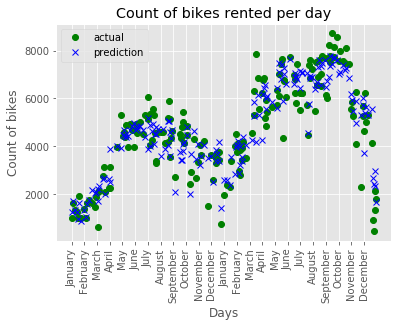

In [69]:
predict = svr_tuned_GS.predict(x_test)
predictions = pd.Series(predict, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='actual')
plt.plot(predictions,'bx', label='prediction')

plt.title('Count of bikes rented per day')
plt.xlabel('Days')
plt.xticks((np.arange(0,len(bike_rent),len(bike_rent)/24)), calendar.month_name[1:13]*2, rotation=90)

plt.ylabel('Count of bikes')

plt.legend(loc='best')

plt.show()

### Improvement

- Can be improved by increasing number of iternation